Assorted plots for mega-meats

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
#TOI 836

sedpath = '../fixed_hlsp/toi-836/hlsp_muscles_multi_multi_toi-836_broadband_v25_adapt-const-res-sed.fits'

hdspec = fits.getdata(sedpath, 1)
kw, kf = hdspec['WAVELENGTH'], hdspec['FLUX']
sol = Table.read('../Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

In [8]:
#xray for next plot
hrc_i = (0.1, 10.0) #keV
acis_s = (0.3, 10) 
epic = (0.15,15)

for x in np.vstack((hrc_i, acis_s, epic)):
    xlam = (x*u.keV).to(u.AA, equivalencies=u.spectral())
    print(xlam)
    

[123.98419843   1.23984198] Angstrom
[41.32806614  1.23984198] Angstrom
[82.65613229  0.82656132] Angstrom


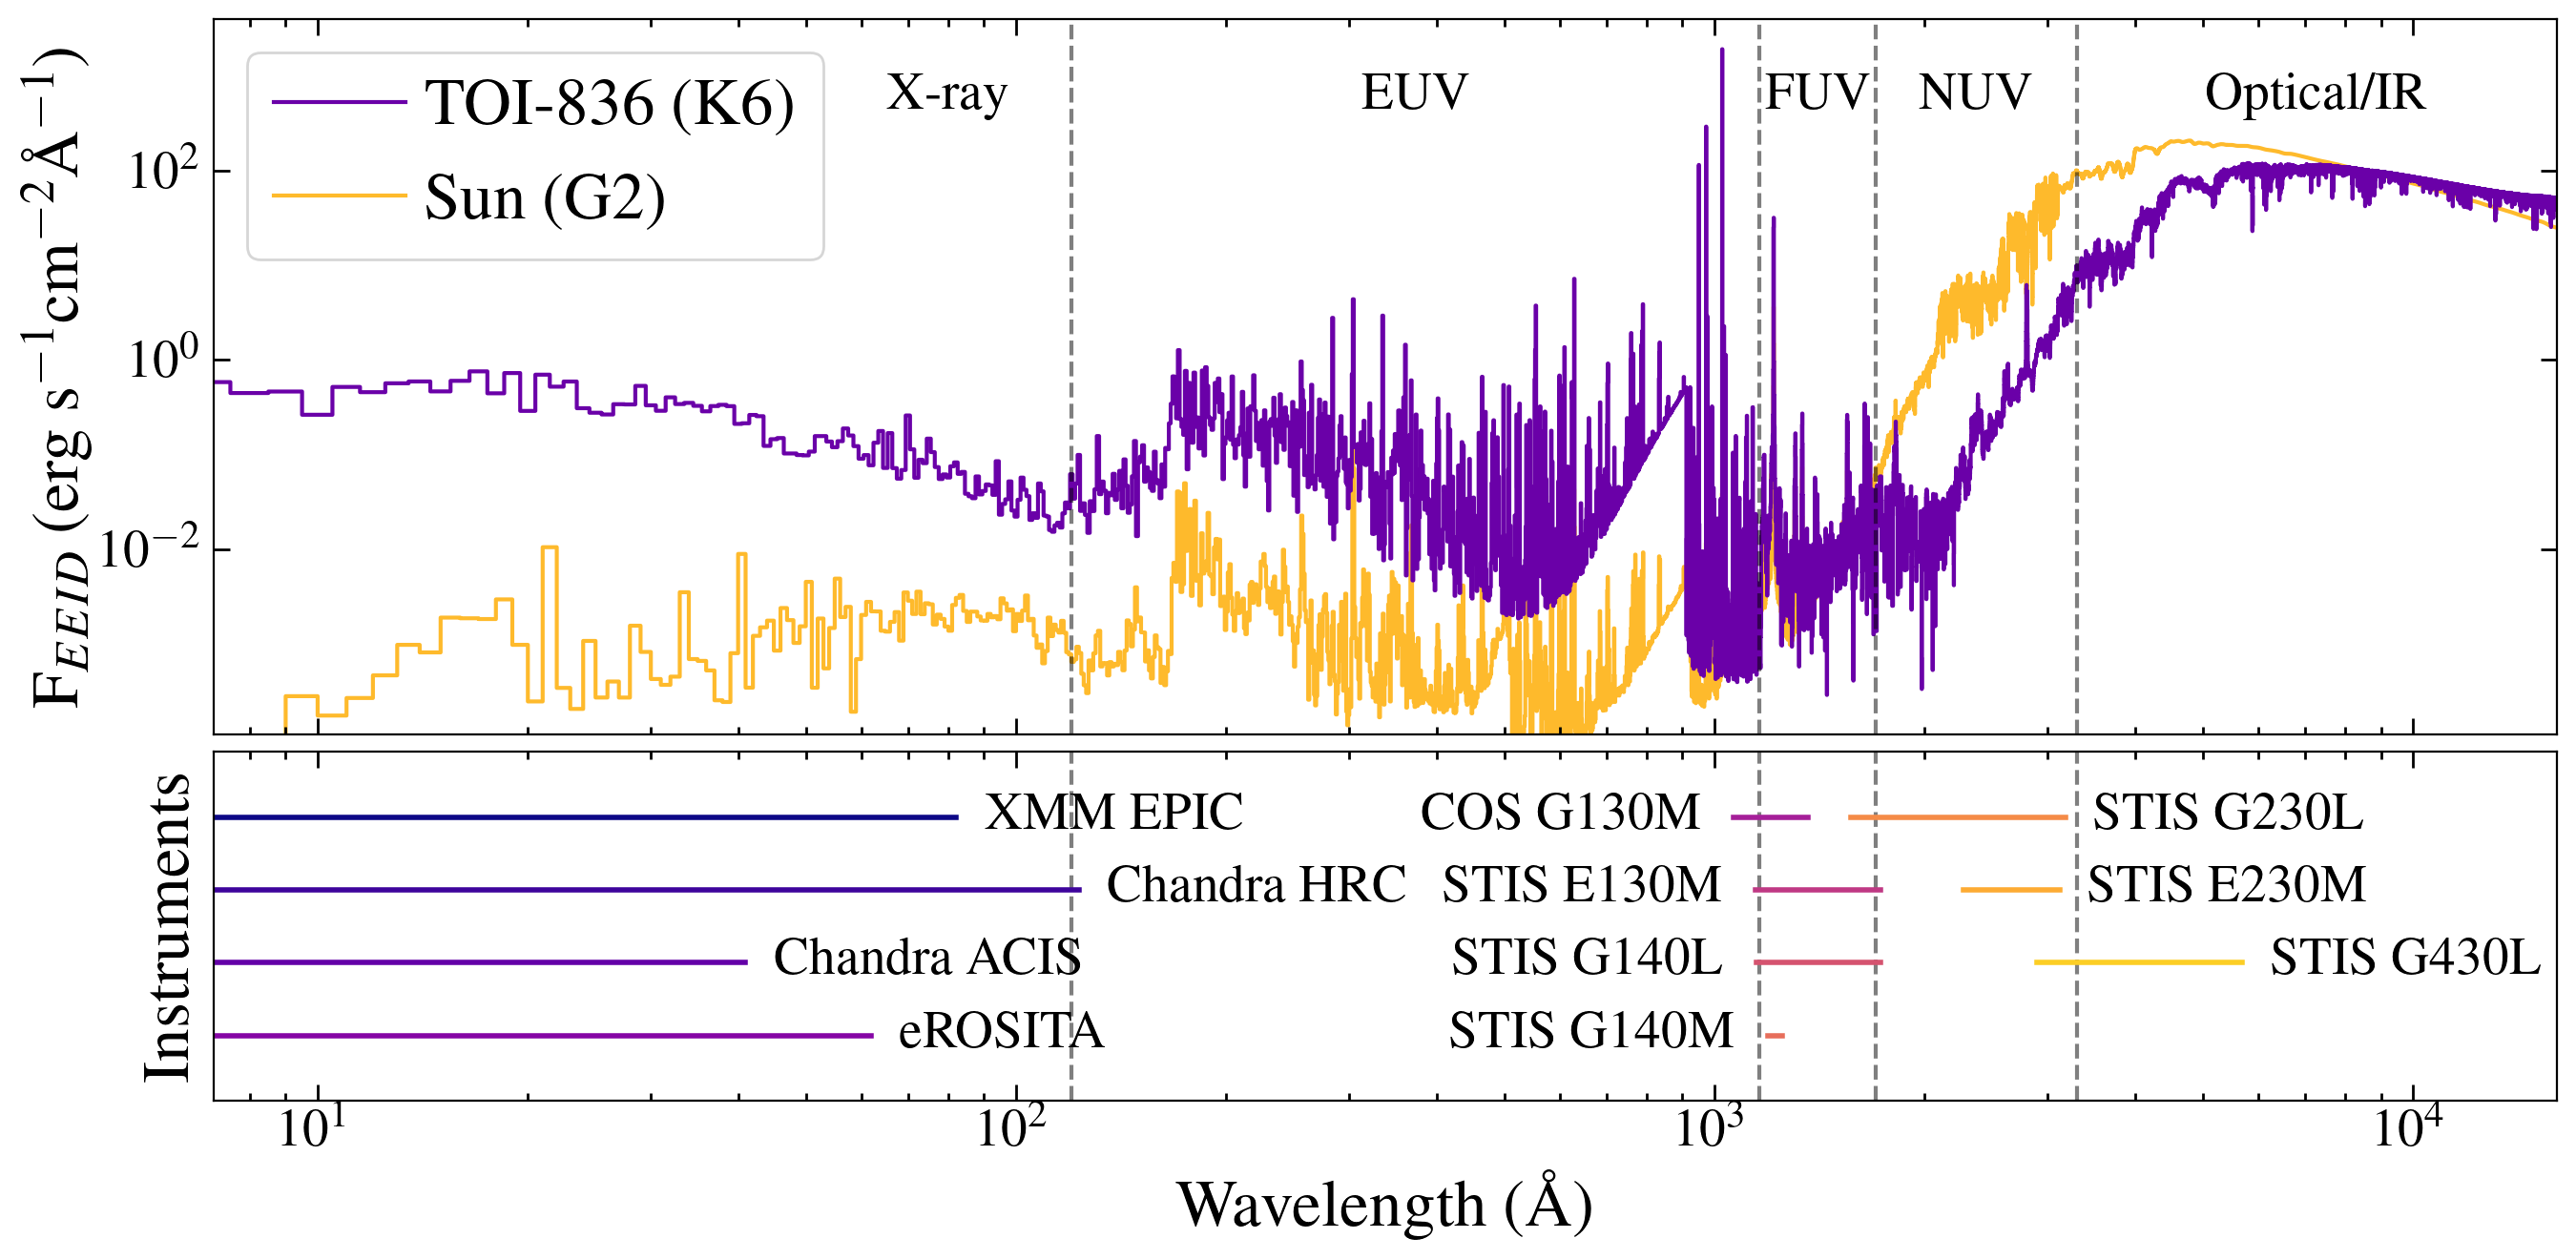

In [41]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# cols = ['C0', 'C1', 'C2']
cols = [plt.cm.plasma(0.2),plt.cm.plasma(0.85), plt.cm.plasma(0.45)]




dstar = 27.5024*u.pc
dsun = 1*u.au
lstar = 10**-0.8527588
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*u.au

solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = (dstar.to(u.m)/eeidau.to(u.m))**2
# print(bb_scale)

# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1]],figsize=(14, 7), sharex=True)


ax= axes[0]
ax.step(kw, kf*starscale, c=cols[0], label = 'TOI-836 (K6)', zorder=1, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2)', zorder=-1, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4e3)


 
bar_y = 4e2
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (7.1, 1.61e4)
ax.set_xlim(xlims[0], xlims[1])
# divlines = (120, 1160, 5690)
# divlines = (900, 3500) 
# [ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# labels = ['CXO/APEC', 'DEM', 'HST', 'PHX']
divlines = (120, 1160, 1700, 3300)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


labels = ['X-ray', 'EUV', 'FUV', 'NUV', 'Optical/IR']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    if i == 0:
        label_x = 80
    ax.annotate(label, (label_x, label_y), ha='center', va='center')


ax.legend(fontsize=25, loc=2,frameon=True)

# ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

ax1.set_xlabel('Wavelength (\AA)', size=25)
# [ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# [123.98419843   1.23984198] Angstrom
# [41.32806614  1.23984198] Angstrom
# [82.65613229  0.82656132] Angstrom

# table of bands 
# telescopes = np.array(['Chandra', 'eROSITA', 'EUVE', 'FUSE', 'GALEX', 'HST', 'IUE', 'ROSAT', 'Swift (XRT)', 'XMM-Newton'])
# bandpasses = np.array([[1.8, 24.8],[5.4, 62],[70,190],[905, 1196], [1350, 2800],[1160, 10070],[1150, 3200], [0.2, 124], [1.2,41.3], [0.8,62]])

telescopes = np.array(['Chandra HRC', 'Chandra ACIS', 'XMM EPIC', 'eROSITA', 'STIS G140L', 'STIS G140M', 'STIS E130M', 'STIS G230L', 'STIS E230M',
                      'STIS G430L', 'COS G130M'],)
bandpasses = np.array([[1.2, 123],[1.2, 41],[0.82, 82],[5.4, 62],[1150,1730], [1194, 1249], [1144, 1729],[1570,3180], [2275, 3119], 
                       [2900,5700],[1064, 1360]])


starts = bandpasses[:,0]
ends = bandpasses[:,1]
args = np.argsort(starts)
telescopes, starts, ends = telescopes[args], starts[args], ends[args]
ys = np.arange(len(telescopes))[::-1]
telcols = np.linspace(0, 0.9, len(telescopes))
for i, scope in enumerate(telescopes):
    ypos = ys[i]
    labelpos = ends[i] *1.1
    ha = 'left'
    if (starts[i] > 800) & (ends[i]< 2000) :
        labelpos = starts[i] *0.9
        ha = 'right'
        ypos += 4
    elif (ends[i] > 2000):
        ypos += 8
    # if scope == 'STIS G430L':
    ax1.annotate(scope, (labelpos, ypos), va='center', ha=ha)
    ax1.plot([starts[i], ends[i]], [ypos, ypos], c=plt.cm.plasma(telcols[i]), lw=2)

ax1.set_yticks([])

ax1.set_ylim(6.1, 10.9)
ax1.set_ylabel('Instruments', size=25)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

plt.savefig('../plots/toi836_v_sun_obs.png', facecolor='w')
plt.savefig('../plots/toi836_v_sun_obs.pdf')

Plot of what stars have what data

In [42]:
proxtab= Table.read('which_data_tab.csv')

In [43]:
proxtab

Name,Teff (K),Parallax (mas),Dist (pc),X-ray,FUV
str9,int64,float64,float64,str1,str1
WASP-63,5550,3.460921346,288.94,N,N
WASP-121,6459,3.6763,272.01,Y,Y
HIP 67522,5675,8.017041586,124.73,Y,Y
Kepler-51,5670,1.2473,801.73,N,N
GJ 367,3522,106.1726822,9.42,Y,Y
K2-18,3457,26.24687716,38.1,N,N
TOI-776,3709,36.82910606,27.15,Y,Y
GJ 341,3770,95.69817587,10.45,Y,Y
TOI-421,5325,13.3407,74.96,N,Y


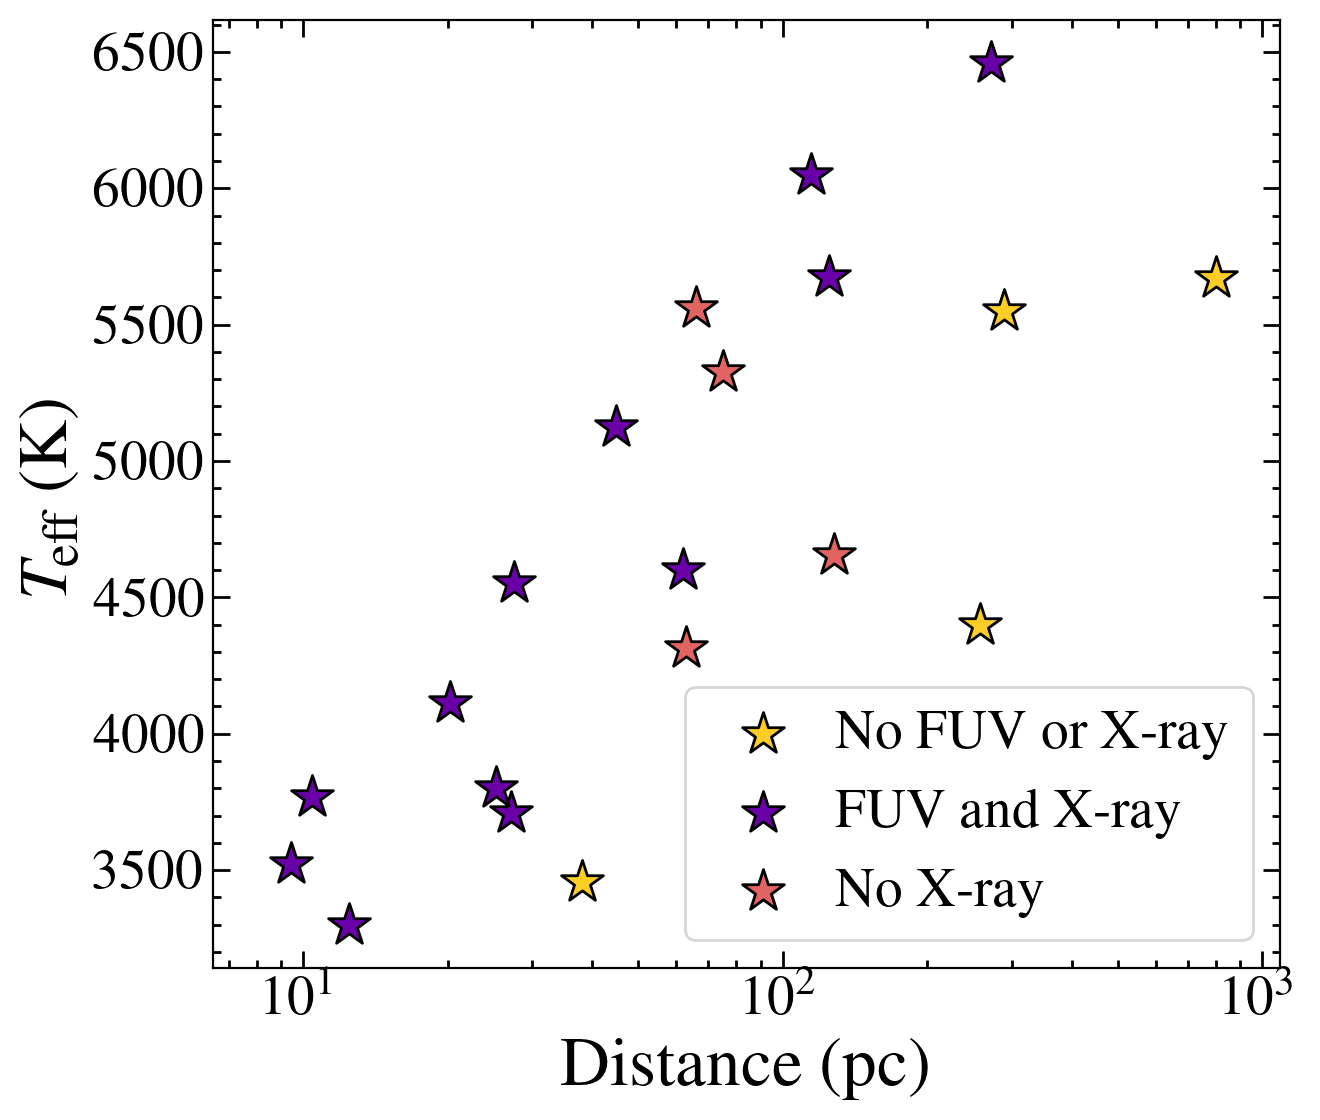

In [91]:
fig, ax = plt.subplots(figsize=(7,6))

dist = proxtab['Dist (pc)']
teff = proxtab['Teff (K)']

cols = [plt.cm.plasma(0.2), plt.cm.plasma(0.6), plt.cm.plasma(0.9)]

for i in range(len(dist)):
    if proxtab['FUV'][i] == 'N':
        label = 'No FUV or X-ray'
        col = cols[2]
    elif proxtab['X-ray'][i] == 'N':
        label = 'No X-ray'
        col = cols[1]
    else:
        label = 'FUV and X-ray'
        col = cols[0]
    ax.scatter(dist[i], teff[i], marker='*', color=col, label = label, edgecolor='k', s=250)

ax.set_xscale('log')

ax.set_xlabel('Distance (pc)', size=25)
ax.set_ylabel('$T_{\mathrm{eff}}$ (K)', size=25)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='outside upper center', ncols=2, bbox_to_anchor=(0.5, 1.2))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=4)
ax.set_xlim(6.5, 1090)

fig.tight_layout()
fig.savefig('../plots/which_data_plot.pdf')